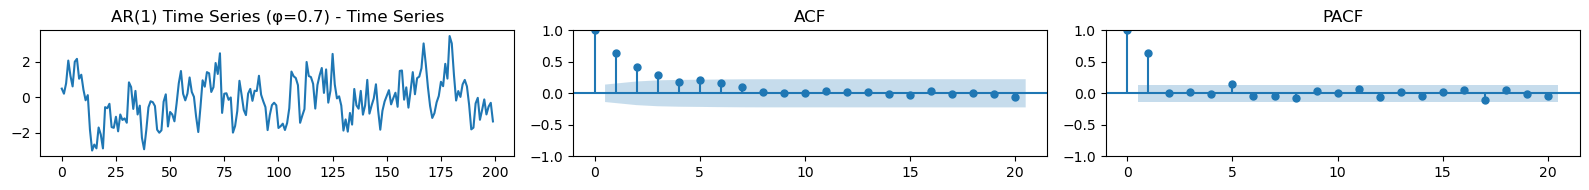

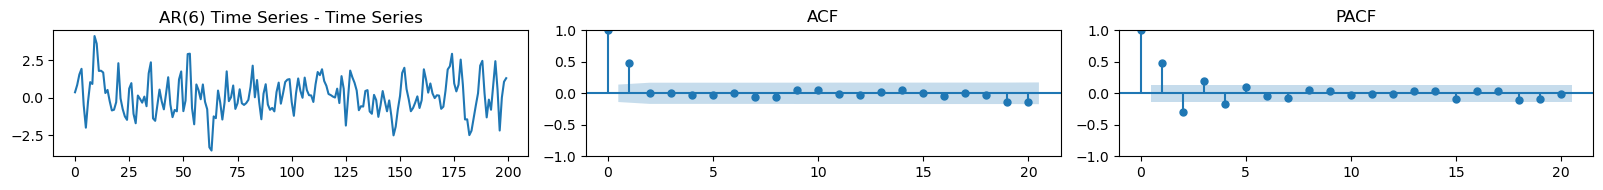

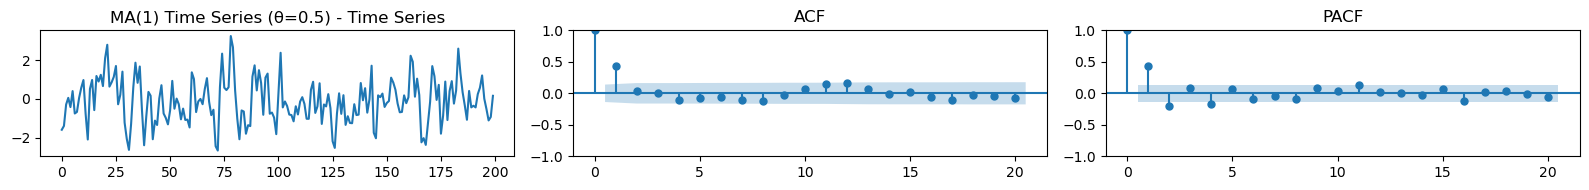

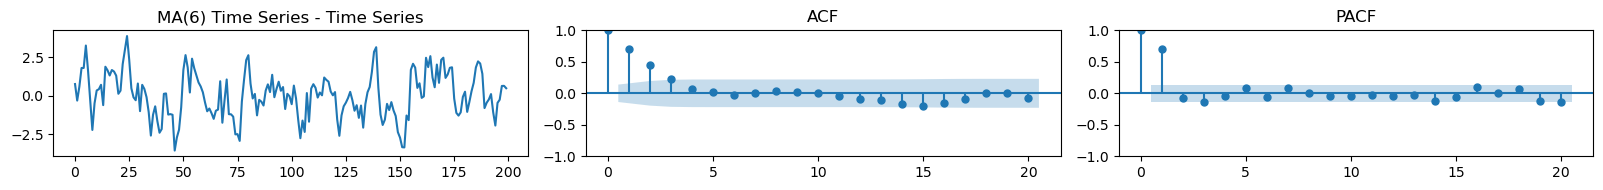

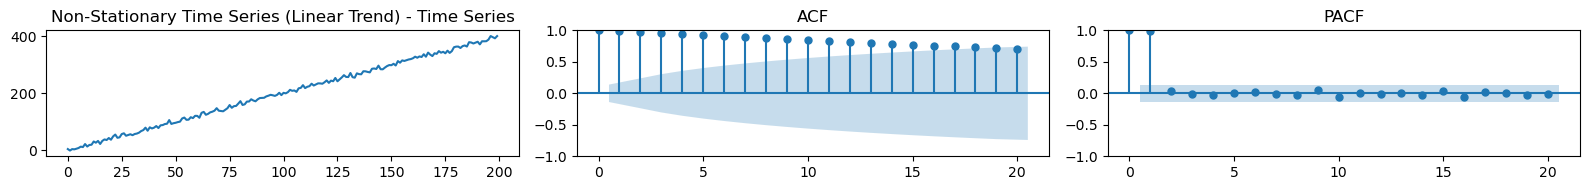

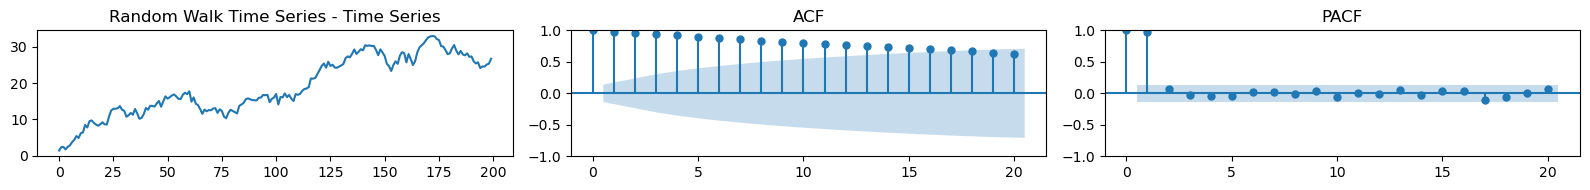

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Function to generate and plot time series, ACF, and PACF
def plot_series_with_acf_pacf(series, title):
    fig, axes = plt.subplots(1, 3, figsize=(16, 2))
    axes[0].plot(series, label="Time Series")
    axes[0].set_title(f"{title} - Time Series")
    # axes[0].legend()
    plot_acf(series, lags=20, ax=axes[1], title="ACF")
    plot_pacf(series, lags=20, ax=axes[2], title="PACF")
    plt.tight_layout()
    plt.show()


# 1. AR(1): Autoregressive process with a single lag
np.random.seed(42)
ar1 = ArmaProcess([1, -0.7], [1]).generate_sample(nsample=200)
plot_series_with_acf_pacf(ar1, "AR(1) Time Series (φ=0.7)")

# 2. AR(6): Autoregressive process with six lags
ar6 = ArmaProcess([1, -0.8, 0.6, -0.4, 0.2, -0.1, 0.05], [1]).generate_sample(
    nsample=200
)
plot_series_with_acf_pacf(ar6, "AR(6) Time Series")

# 3. MA(1): Moving average process with a single lag
ma1 = ArmaProcess([1], [1, 0.5]).generate_sample(nsample=200)
plot_series_with_acf_pacf(ma1, "MA(1) Time Series (θ=0.5)")

# 4. MA(6): Moving average process 
# MA coefficients: [θ1, θ2, θ3, θ4, θ5, θ6]
ma6 = ArmaProcess([1], [1, 0.8, 0.6, 0.4, 0.2, 0.1, 0.05]).generate_sample(nsample=200)
plot_series_with_acf_pacf(ma6, "MA(6) Time Series")

# 5. Non-Stationary: Additive linear trend
time = np.arange(200)
non_stationary = 2 * time + np.random.normal(scale=5, size=200)
plot_series_with_acf_pacf(non_stationary, "Non-Stationary Time Series (Linear Trend)")

# 6. Random Walk: Cumulative sum of white noise
random_walk = np.cumsum(np.random.normal(size=200))
plot_series_with_acf_pacf(random_walk, "Random Walk Time Series")